# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.tail()

197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
197620,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,05:00:00,REGULAR,5554,348
197621,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,09:00:00,REGULAR,5554,348
197622,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,13:00:00,REGULAR,5554,348
197623,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,17:00:00,REGULAR,5554,348
197624,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,21:00:00,REGULAR,5554,348


## Rename all the columns to lower case

In [3]:
#Your code here
df = df.rename(str.lower, axis='columns')
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the Index to be the Line Names

In [51]:
#Your code here
df = df.set_index('linename')
df.head()

,c/a,unit,scp,station,division,date,time,desc,entries,exits
linename,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Change the index back

In [55]:
# Your code here
df = df.reset_index()

## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order
*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [4]:
# Your code here
df['Num_Lines'] = df.linename.map(len)

In [84]:
df.head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,Num_Lines
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184,7
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188,7
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229,7
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314,7
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384,7


## Write a function to clean a column name

In [5]:
def clean(col_name):
    cleaned = col_name.strip()#Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    
    return cleaned

In [6]:
# This is a list comprehension. It applies your clean function to every item in the list.
# We then reassign that to df.columns
# You shouldn't have to change anything here.
# Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [7]:
# Checking the output, we can see the results.
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits', 'Num_Lines'],
      dtype='object')

## Group the Data by Day of Week and Plot the Sum of The Numeric Columns

In [8]:
# Your code here
df.date = pd.to_datetime(df.date)

In [9]:
df['dayofweek'] = df.date.dt.day_name()

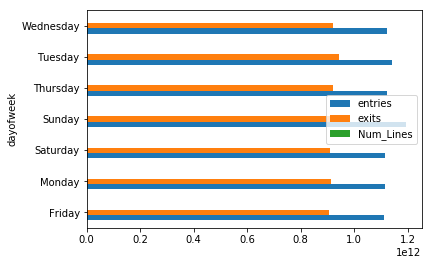

In [10]:
grouped = df.groupby('dayofweek').sum()
grouped.plot(kind='barh')


In [11]:
grouped.head()

,entries,exits,Num_Lines
dayofweek,,,
Friday,1110224700078,906799065337,75573
Monday,1114237052454,911938153513,76110
Saturday,1115661545514,909142081474,74725
Sunday,1192306179082,959223750461,75306
Thursday,1122723988662,920691927110,76607


## Group the Data by Weekend/Weekday and Plot the Sum of the Numeric Columns

In [12]:
#Your code here
grouped = grouped.reset_index()

In [13]:
grouped['IsWeekend'] = grouped.dayofweek.map({'Monday':False,'Tuesday':False,'Wednesday':False,'Thursday':False,'Friday':False,'Sunday':True,'Saturday:True})
wkend = grouped.groupby('IsWeekend').mean()
wkend[['ENTRIES', 'EXITS']].plot(kind='barh')

NameError: name 'Monday' is not defined

## Analysis Question: 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# Your answer here 

## Drop a couple of columns

In [ ]:
# Your code here

## Summary

Great! You practiced your data cleanup-skills using Pandas.